Final project notebook report (10%) – due 1pm on December 12, 2024

In addition to outlining everything that you have done, the final deliverables have concrete requirements:
- Data: Please submit your cleaned data or, if it’s too large, a reference to the original data as well as the scripts you used to clean it.
- ML/Stats: Use at least two machine learning or statistical analysis techniques to analyze your data, explain what you did, and talk about the inferences you uncovered (or discovered if nobody has done the analysis before).
- Visualization: Provide at least two distinct visualizations of your data or final results. This means two different techniques. If you use bar charts to analyze one aspect of your data, while you may use bar charts again, the second use will not count as a distinct visualization.
- Additional work: In addition to the requirements in the ML and visualization sections above, we would like to see at least one extra from either category. That means a total of five deliverables.
- Results: Fully explain and analyze the results from your data, i.e. the inferences or correlations you uncovered, the tools you built, or the visualizations you created.

What you need to submit: All your code should be in your team’s repository. When printed to a PDF, your notebook should be no more than 10 pages. Anything beyond 10 pages will be ignored and not graded.


Github Link: https://github.com/cs418-fa24/project-check-in-team-8 

PROJECT INTRODUCTION(MANU): 

Our project centers around analyzing NFL data from the 2024 season to uncover predictive indicators for Super Bowl success. By utilizing machine learning models, we aim to determine which team statistics correlate most strongly with playoff wins. Specifically, we’re investigating offensive stats like Passing Yards, Rushing Yards, and Receiving Yards, alongside defensive metrics such as Tackles and Interceptions, and team performance in terms of wins. This data is collected from ESPN using web scraping tools, then organized in a pandas DataFrame and exported to a CSV file for further analysis. Additionally, we’re delving into draft pick histories to evaluate the performance of quarterbacks based on their draft position, comparing higher and lower picks, and examining if backup quarterbacks outperform starters in the long run.

ANY CHANGES(MANU): 

Since our initial proposal, we’ve refined the project scope to focus more narrowly on key offensive and defensive stats, instead of incorporating a wider array of advanced metrics. After discussing with our professor, we agreed to focus on six main statistics to ensure clarity in our analysis and predictive models. We’ve also added a historical comparison of quarterback draft picks, specifically those from 2015 to 2021, to explore if lower-drafted quarterbacks outperform higher picks over time and if backup quarterbacks show better performance metrics than starters. By narrowing our scope and adding these focused research questions, we aim to produce a robust and targeted analysis of what it takes to build a Super Bowl-winning team.

11/17/24 
- Vasu and Shriniket added the year drafted to each qb in the csv file so that we can do more accurate visualizations and data anaylsis. 

DATA CLEANING(GAGE): 

Since data was collected in a collaborative effort, most of the initial work that was required for further analysis consisted of combining the respective datasets into one CSV file, as well as cleaning the data itself. The column names of various initial files contained inconsistencies which had to be dealt with prior to combining ("Pass Attempts" vs "Passing Attempts", "Cmp_Pct" vs "Completion Percentage", etc). Once these files were combined, any potential null values were checked and amended to 0, or the appropriate value.

EXPLORATORY DATA ANALYSIS(GAGE): 

Our primary objective is to investigate the relationship between a quarterback’s draft position and their subsequent performance, as indicated by key metrics such as average Quarterback Rating (QBR) and win rate. This analysis aims to uncover whether draft position serves as a reliable predictor of success or if other factors play a more significant role in determining a quarterback's performance in the NFL.

Initial Visualization
To examine this relationship, we created a scatter plot with draft pick position on the x-axis and average QBR on the y-axis. Each point in the scatter plot represents a quarterback, with the color of the point indicating their win rate and the size representing their averaged passing yards per game. This visualization allows us to explore multiple dimensions of the data simultaneously, offering a broad view of performance trends relative to draft position.

Trend Analysis
The scatter plot shows a general downward trend, suggesting that quarterbacks selected earlier in the draft (lower draft pick numbers) tend to achieve higher QBRs on average. This aligns with the common expectation that higher draft picks, often selected based on superior performance and potential, are more likely to succeed in the NFL.
While the trend is evident, there are notable deviations that imply not all early draft picks live up to expectations, nor are all late draft picks destined to struggle.
Correlation with Win Rate and Passing Yards:
The win rate, represented by the color gradient, tends to be higher among quarterbacks picked earlier in the draft. This further reinforces the idea that higher draft picks are more successful, likely due to their skills as well as the support systems often associated with teams picking at the top of the draft.
Passing yardage, indicated by the size of the points, also skews larger among higher draft picks. However, there are noticeable outliers late-round quarterbacks, such as Dak Prescott at pick #135, with substantial passing yards — pointing to instances where teams successfully identified and developed talent outside the early rounds.
Outliers and Underdogs:
Interestingly, the outliers tend to favor late-round quarterbacks who significantly overperform their draft value. Examples might include quarterbacks who were overlooked during the draft but later proved their worth through exceptional skill development or favorable circumstances.
Conversely, it is less common to see high draft picks with abysmal performance, suggesting that the scouting and selection process is somewhat effective at identifying top talent, even if not foolproof.
Initial Conclusions
From our initial analysis, we can draw an initial conclusion: quarterbacks selected earlier in the draft generally achieve better performance metrics, including QBR, win rate, and passing yardage. However, the presence of outliers highlights that draft position is not the sole determinant of success. Factors such as coaching quality, offensive schemes, individual development, and resilience likely play crucial roles in shaping a quarterback's career trajectory.

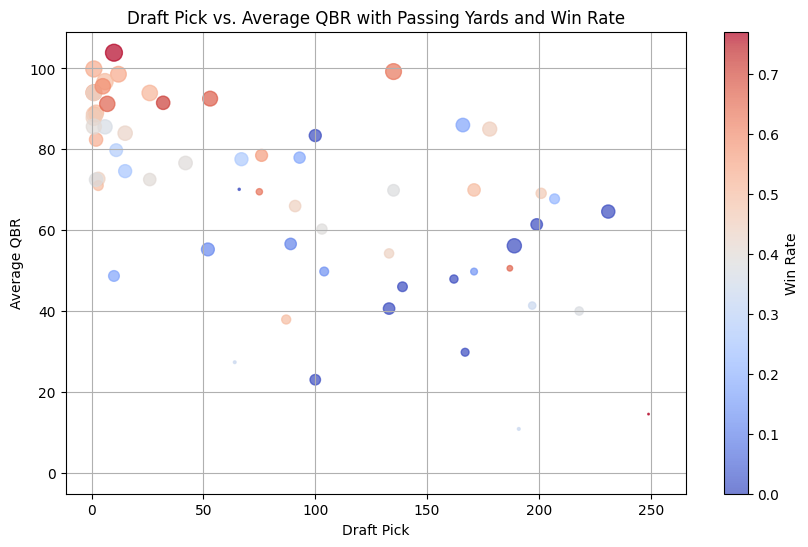

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from debugpy import listen

combined = pd.read_csv("combinedQBStats.csv")

qb_performance = combined.groupby("Name").agg(
    avg_QBR=("QBR", "mean"),
    avg_passing_yards=("Passing Yards", "mean"),
    draft_pick=("Draft Pick", "first"),
    win_rate=("Game Result (W/L)", lambda x: (x == "W").mean())
).reset_index()

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    qb_performance["draft_pick"],
    qb_performance["avg_QBR"],
    s=qb_performance["avg_passing_yards"] * 0.5,  
    c=qb_performance["win_rate"], cmap="coolwarm", alpha=0.7
)

plt.colorbar(scatter, label="Win Rate")
plt.xlabel("Draft Pick")
plt.ylabel("Average QBR")
plt.title("Draft Pick vs. Average QBR with Passing Yards and Win Rate")

plt.grid(True)

plt.show()


The hypothesis here is the idea of seeing a higher QBR when having a higher drafted QB. This visualization takes into account all the years in which the data was collected for. This visualization also seems to prove that case because if we look at the legend we can see a lot of red data points towards the top 25 draft picks. A lot of the blue points however are scattered throughout the plot. However in the general case our hypothesis seems to be valid and correct

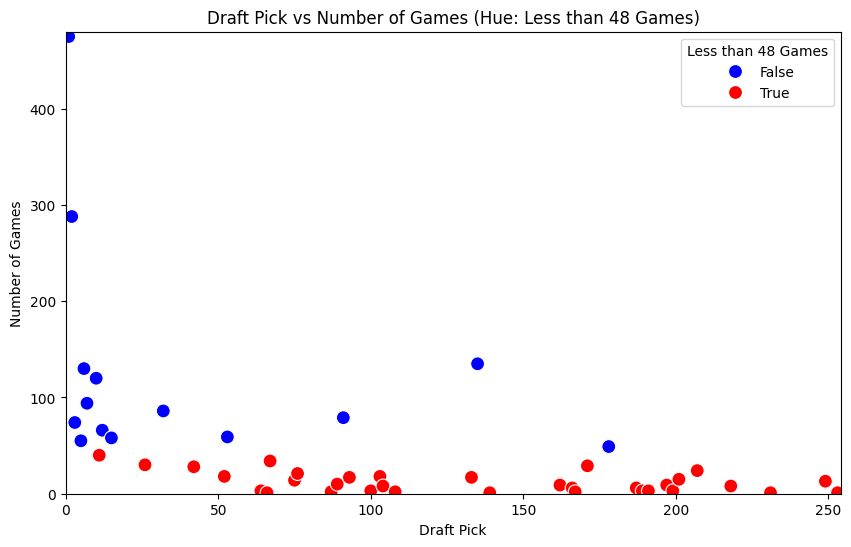

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
df = pd.read_csv('combinedQBStats.csv')

# Count the number of games for each draft pick
games_count = df.groupby("Draft Pick").size().reset_index(name="Count")

# Add a column for hue (less than 48 games)
games_count['Less than 48 Games'] = games_count['Count'] < 48

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=games_count, x="Draft Pick", y="Count", hue="Less than 48 Games", 
                palette={True: 'red', False: 'blue'}, s=100)

# Adjust axes to add padding
plt.xlabel("Draft Pick")
plt.ylabel("Number of Games")
plt.title("Draft Pick vs Number of Games (Hue: Less than 48 Games)")
plt.xlim(games_count["Draft Pick"].min() - 1, games_count["Draft Pick"].max() + 1)
plt.ylim(games_count["Count"].min() - 1, games_count["Count"].max() + 5)

# Add legend
plt.legend(title="Less than 48 Games")
plt.show()


The scatter plot illustrates the relationship between draft pick number and the number of games played by players. The x-axis represents the draft pick number, while the y-axis shows the total number of games played. Data points are color-coded based on whether a player played fewer than 48 games: blue dots represent players who played 48 or more games, while red dots indicate players who played fewer than 48 games. The plot reveals that players with lower draft pick numbers (closer to 1) tend to play more games, as evidenced by the cluster of blue dots at the top left. In contrast, players with higher draft pick numbers are more likely to play fewer games, with red dots scattered at lower y-values. This suggests a potential relationship between draft pick order and career longevity in terms of games played. I hypothesize that players selected earlier in the draft are more likely to have longer careers, as measured by the number of games played, compared to players selected later in the draft because since they are a higher pick, they get more of a chance to play more games and make more mistakes. If you are a higher pick and if you make mistakes, you would not get as many chances.

C:\Users\vasup\AppData\Local\Temp\ipykernel_14656\4263035573.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=avg_passing_yards, x='Draft Group', y='Passing Yards', palette='coolwarm')


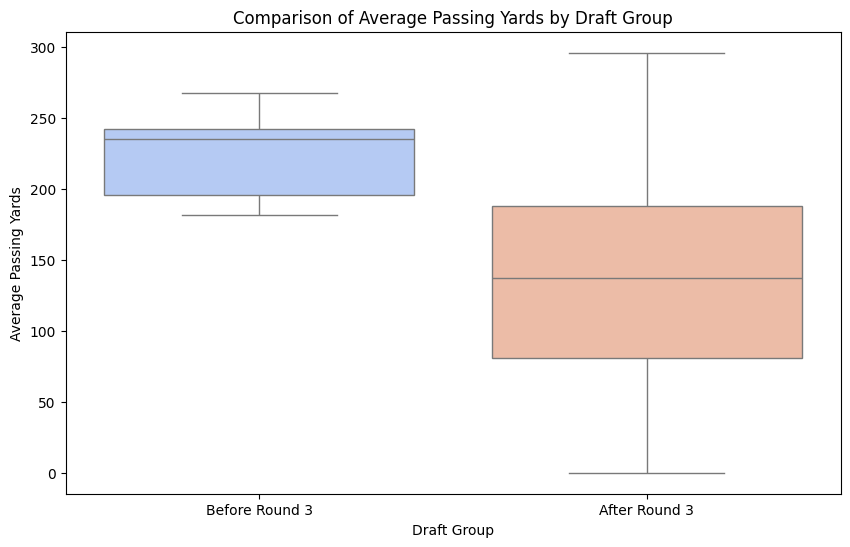

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('combinedQBStats.csv')

# Add a column to classify quarterbacks into "Before Round 3" and "After Round 3"
df['Draft Group'] = df['Draft Pick'].apply(lambda x: 'Before Round 3' if x < 3 else 'After Round 3')

# Group by QB Name and Draft Group to calculate average passing yards
avg_passing_yards = df.groupby(['Name', 'Draft Group'])['Passing Yards'].mean().reset_index()

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=avg_passing_yards, x='Draft Group', y='Passing Yards', palette='coolwarm')

# Add labels and title
plt.xlabel("Draft Group")
plt.ylabel("Average Passing Yards")
plt.title("Comparison of Average Passing Yards by Draft Group")

# Show the plot
plt.show()


The box plot compares the average passing yards of quarterbacks (QBs) based on their draft round. The x-axis distinguishes two groups:"Before Round 3" and "After Round 3," while the y-axis represents average passing yards. QBs drafted before Round 3 shows a higher median passing yardage compared to those drafted after Round 3. The interquartile range (IQR) is also larger, indicating greater variability in performance among early-round QBs. Outliers are present for QBs drafted before Round 3, with significantly lower passing yardages. For QBs drafted after Round 3, the box plot is more compact, suggesting less variability in performance but generally lower passing yardages overall. I hypothesized that Quarterbacks drafted in earlier rounds (before Round 3) tend to have higher average passing yards compared to those drafted in later rounds.

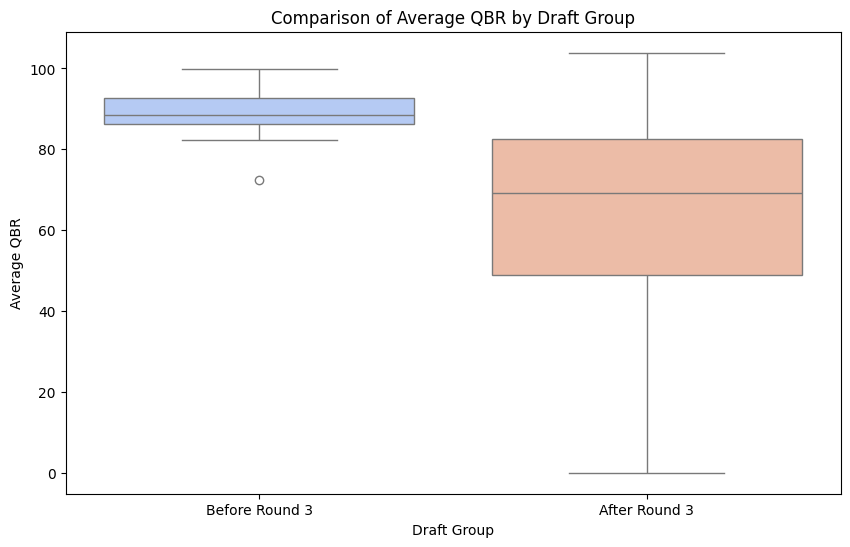

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('combinedQBStats.csv')

# Add a column to classify quarterbacks into "Before Round 3" and "After Round 3"
df['Draft Group'] = df['Draft Pick'].apply(lambda x: 'Before Round 3' if x < 3 else 'After Round 3')

# Group by QB Name and Draft Group to calculate average QBR
avg_qbr = df.groupby(['Name', 'Draft Group'])['QBR'].mean().reset_index()

# Create the box plot with updated syntax to remove the warning
plt.figure(figsize=(10, 6))
sns.boxplot(data=avg_qbr, y='QBR', x='Draft Group', hue='Draft Group', palette='coolwarm', legend=False)

# Add labels and title
plt.xlabel("Draft Group")
plt.ylabel("Average QBR")
plt.title("Comparison of Average QBR by Draft Group")

# Show the plot
plt.show()


The box plot compares the average Quarterback Ratings (QBR) of quarterbacks based on their draft round, categorizing them into two groups: "Before Round 3" and "After Round 3." The x-axis differentiates these two groups, while the y-axis represents the average QBR of quarterbacks in each group. Quarterbacks drafted before Round 3 generally show higher median QBR values compared to those drafted after Round 3, indicating that early-round QBs tend to perform better on average. Additionally, the interquartile range (IQR) for quarterbacks drafted before Round 3 is narrower, suggesting more consistent performance among these players. However, there are several outliers with notably low QBR values among early-round quarterbacks, indicating that even higher-drafted QBs can underperform in certain situations. In contrast, quarterbacks drafted after Round 3 have a lower median QBR, and their broader IQR shows greater variability in performance, meaning their performance is more inconsistent. Overall, this analysis supports the hypothesis that quarterbacks drafted in earlier rounds are more likely to achieve higher and more consistent QBRs, aligning with the expectation that higher-drafted players possess greater talent and preparation.

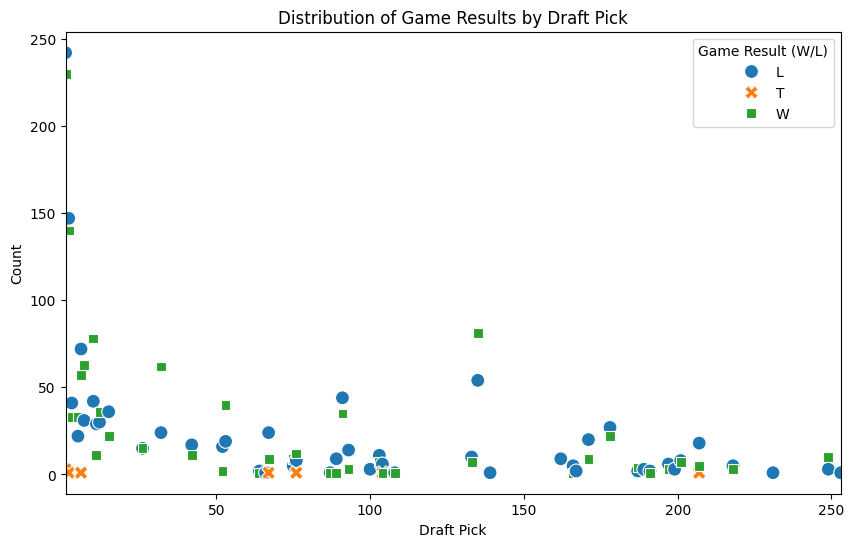

In [17]:
# Another Visualization (Shriniket)
# Assuming the data is loaded correctly
nfl_stats = pd.read_csv('combinedQBStats.csv')
df = nfl_stats.groupby(["Draft Pick", "Game Result (W/L)"]).size().reset_index(name='Count')

# Plot using Seaborn scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Draft Pick", y="Count", hue="Game Result (W/L)", style="Game Result (W/L)", s=100)
plt.xlabel("Draft Pick")
plt.ylabel("Count")
plt.title("Distribution of Game Results by Draft Pick")
plt.xlim(1, df["Draft Pick"].max())
plt.show()

A Hypothesis That we had when it come to Draft Picks was whether they were Winning or Not. Our original hypothesis is that Higher Draft picks will likely lose more than they win. This visualization shows us the count of Wins/Losses/ties for Draft Picks at certain numbers which helps us validate the hypothesis that we had in this situation. This hypothesis seemed to be proven somewhat incorrect as it seems to be a 50-50 chance. One other assumption we had was that QB's chosen later in the draft will likely win more, because generally good teams select in the later rounds at later spots. Although sample sizes are different for the draft picks a lot of the data is even which further validates this hypothesis. 

Linear Model predictions [82.97359898 82.7850827  82.59656641 82.21953383 82.03101754 81.84250125
 81.27695239 81.0884361  80.89991981 80.33437095 78.26069178 77.12959405
 75.24443117 73.35926829 73.170752   71.09707283 70.72004025 70.53152396
 69.02339366 68.83487737 66.7611982  66.38416562 66.00713305 65.63010047
 64.31048645 63.74493759 63.5564213  62.80235615 58.08944894 57.71241636
 56.95835121 52.62247658 51.86841143 51.67989514 50.92582999 49.60621597
 47.90956938 47.5325368  47.15550423 46.0244065  45.64737392 45.27034134
 44.13924361 42.06556444 39.6148527  35.46749436]


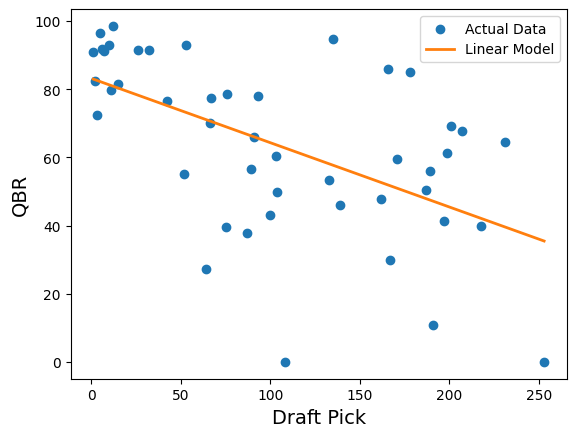

Mean Squared Error for linear_regression model: 432.3300536059247 and Baseline model: 630.0948169311987
R^2 for linear_regression model: 0.313865085081105 and Baseline model: 0.0


In [18]:
from sklearn.metrics import mean_squared_error, r2_score
# 1st ML ANALYSIS(SHRINIKET AND CARLOS)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression, LogisticRegression

nfl_qb_stats = pd.read_csv('combined_qb_stats.csv')

mean_qbr_by_draft_pick = nfl_qb_stats.groupby("Draft Pick")[["QBR"]].mean().reset_index()
X = mean_qbr_by_draft_pick["Draft Pick"].values.reshape(-1, 1)
y = mean_qbr_by_draft_pick[["QBR"]]

## Actual Model being used
linear_regression = LinearRegression()
linear_regression.fit(X, np.ravel(y))
linear_model_predictions = linear_regression.predict(X)
# for x_val, prediction in zip(X, linear_model_predictions):
#     print(f"{x_val}: {prediction}")
# print(X)
print(f"Linear Model predictions {linear_model_predictions}")

plt.scatter(X, y, color="#1f77b4", label="Actual Data")
plt.plot(X.ravel(), linear_model_predictions, color="#ff7f0e", linewidth=2, label="Linear Model")
plt.xlabel('Draft Pick', fontsize=14)
plt.ylabel('QBR', fontsize=14)
plt.legend()
plt.show()

## Baseline model


baseline_predictions = np.full_like(y, np.mean(y))

linear_model_predictions = np.array(linear_model_predictions)

actual_values = y.values.flatten()

baseline_mse = mean_squared_error(actual_values, baseline_predictions)

linear_model_mse = mean_squared_error(actual_values, linear_model_predictions)

print(f"Mean Squared Error for linear_regression model: {linear_model_mse} and Baseline model: {baseline_mse}")

baseline_r2 = r2_score(actual_values, baseline_predictions)

linear_model_r2 = r2_score(actual_values, linear_model_predictions)

print(f"R^2 for linear_regression model: {linear_model_r2} and Baseline model: {baseline_r2}")


# for i in range(1, 250):
#     print(linear_regression.predict(X))

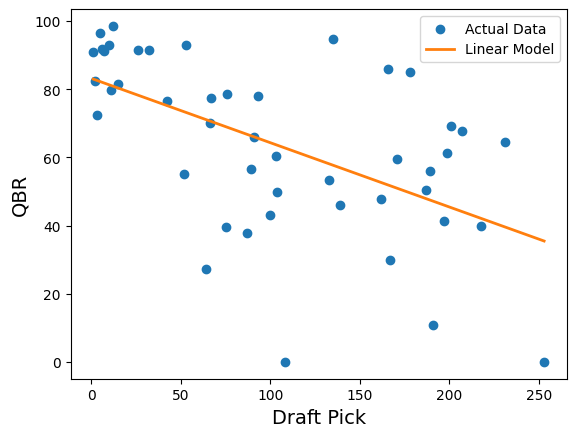

In [19]:
plt.scatter(X.ravel(), y.values.ravel(), color="#1f77b4", label="Actual Data")
plt.plot(X.ravel(), linear_model_predictions, color="#ff7f0e", linewidth=2, label="Linear Model")
plt.xlabel('Draft Pick', fontsize=14)
plt.ylabel('QBR', fontsize=14)
plt.legend()
plt.show()

Inferences Covered: Essentially we were able to find our Linear Regression Model captures the data relatively well. Since this is a regression model, we use metrics such as R^2 as well as MSE to test the effectiveness of the model. Our Metrics indicate solid numbers, which makes sense considering the various amount of outliers that exist when it comes to QBRs. However the specific trend that we uncovered from the Model is that QBR tends to be lower relative to Draft Pick. Lower Draft Picks tend to have lower QBR. The reason that only one input feature was used is because QBR does a solid job of capturing how well a QB played for a certain game.  

In [20]:
from sklearn.tree import plot_tree
# 2nd ML analysis (Shriniket and Carlos)
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression, LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier

nfl_qb_stats = pd.read_csv('combined_qb_stats.csv')

def draft_pick_group(draft_pick):
    if 1 <= draft_pick <= 96:
        return 1
    else:
        return 0
                                                                     
nfl_qb_stats['Draft Group'] = nfl_qb_stats['Draft Pick'].apply(draft_pick_group)

nfl_qb_stats.to_csv("draft_groups.csv")


X = nfl_qb_stats[["Passing Yards", "Passing Touchdowns", "Pass Completions", "Rushing Yards", "Draft Group"]]
y = nfl_qb_stats[["Game Result (W/L)"]]

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)
tree_predictions = tree_clf.predict(X)
print(f"Decision Tree Classifier Model Score {tree_clf.score(X, np.ravel(y))}")

logistic_regression = LogisticRegression()
logistic_regression.fit(X, np.ravel(y))
logistic_model_predictions = logistic_regression.predict(X)
# print(f"Logistic Model predictions {list(logistic_model_predictions)}")
print(f"(Baseline) Logistic Model score {logistic_regression.score(X, np.ravel(y))}")


ModuleNotFoundError: No module named 'mlxtend'

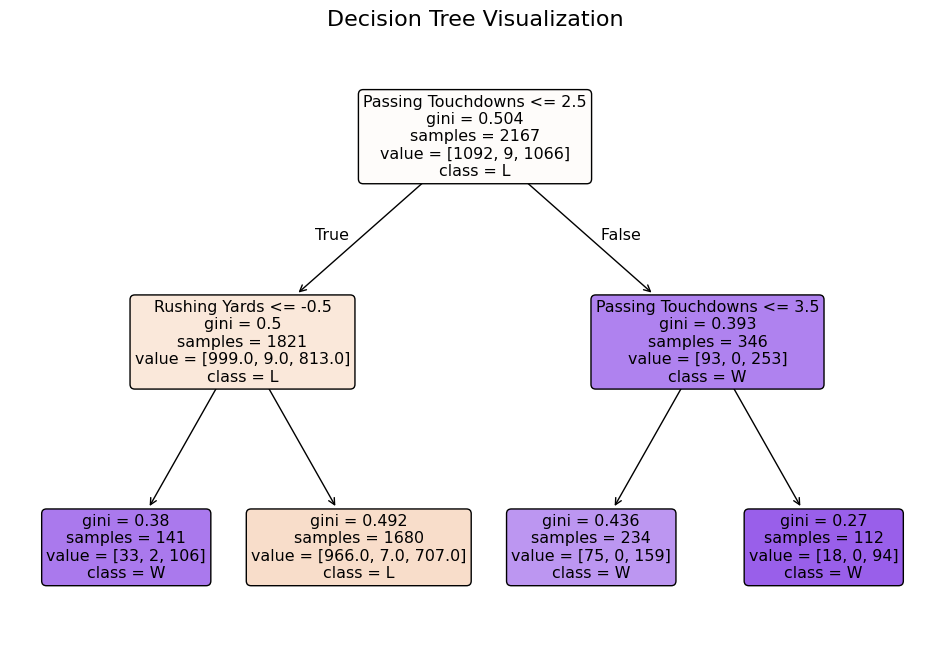

In [5]:
# Decision Tree Visualizations
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, 
          feature_names=["Passing Yards", "Passing Touchdowns", "Pass Completions", "Rushing Yards", "Draft Group"], 
          class_names=["L", "T", "W"], 
          filled=True, 
          rounded=True)

plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

Inferences Covered: We were able to find that having higher statistics ("Passing Yards", "Passing Touchdowns", "Pass Completions", "Rushing Yards", "Draft Group"), leads to having a better chance to win games. As seen with the Decision tree visualization, the decision tree tends to classify higher statistics for Passing Touchdowns as a better chance as a win. This is just a sample that goes into the how the decision tre works, but there are other input features going into play for this specific situation. The decision tree Classifier and Logistic Regression Classifer performed well, with the decision tree classifier performing a tad bit better due to its ability to handle outliers and noise. 

REFLECTION(ZEESHAN): 

Some difficulties with the project so far have been the large variance within the data, as our sample size is focused on just quarterbacks over the last few years. Because of the constantly changing offensive environment in the league, it's difficult to compare across eras which means our data must be concentrated on modern QBs. This in turn limits the amount of data we can use to compare and make valid conclusions with. The initial insights we've seen have matched up with logical thinking; quarterbacks who were drafted higher have, on average, higher passer ratings. This would make sense as a higher draft pedigree usually correlates with better performance in the league. There's also a large concentration of QBs who are taken very early in the draft, thinning out in occurrence as the rounds progress. This also lines up with conventional football wisdom, which deems the quarterback the most valuable player on the team. Even those who are not worth high draft pick capital are taken earlier than an equivalent skill player because of the positional value. 

Some issues which could prevent further data exploration include the aforementioned variance within our data set, which could cause some data analysis to be flawed. This shouldn't be an issue if we focus on game-by-game stats and comparisons, as we have plenty of those. But overall career comparisons become much trickier. There's also a lot of context which is sometimes necessary to evaluate performance, which can't be quantified. Injuries can limit a start and cut the statistical numbers down, which isn't accounted for. Overall though, it should'nt pose a big issue and we are on track with our project. 

Based on the initial exploration of the data, it seems that proceeding with the project could still be valuable, but there are important considerations that could affect its effectiveness. If the results from the first exploratory analysis, such as the relationship between draft pick and average QBR, appear to show weak or inconsistent patterns, it might suggest that the draft pick alone is not a strong indicator of a quarterback's performance.

If the results are not promising, the project could be adjusted to focus on more comprehensive factors. For example, instead of focusing solely on draft pick, we could explore the relationship between performance metrics (like passing yards, touchdowns, interceptions, etc.) and QBR, or even expand the analysis to include the impact of external factors such as the team’s offensive line, coaching staff, or even injury history. Additionally, we could consider a more granular approach by investigating individual quarterback performance over time, using machine learning models to predict success based on a combination of factors.

This revised approach could yield more meaningful insights, as it accounts for the complexity of quarterback performance and avoids oversimplifying the role of draft pick in determining success. A multi-variable model or even a deep dive into performance trends across seasons might offer clearer predictors for success in the NFL. By incorporating a wider range of variables, we can improve the robustness of the analysis and provide more actionable insights for both player evaluation and team management. Therefore, the revised scope would enhance the project by considering a more realistic and holistic view of factors influencing quarterback performance.

ROLES/COORDINATION(VASU): 

Data Acquisition: Shriniket identified a website to scrape NFL quarterbacks' stats, setting the foundation for our data collection. To streamline the process, Shriniket and Vasu created a Google Sheet outlining the structure of the final dataset, specifying the columns and details required for each quarterback. With data needed for the years 2015-2021, we divided the task among our seven team members, each assigned to scrape data for a specific year. Once all members had gathered their data and saved it into individual CSV files, Shriniket and Gage consolidated these files into a single master CSV, creating a comprehensive dataset for our analysis.

Vasu is responsible for co-managing the project, ensuring that everything runs smoothly and that tasks are completed on schedule. He assigns tasks to each team member, monitors their progress, and follows up to ensure deadlines are met. In addition to overseeing the workflow, Vasu also creates data visualizations based on the master CSV file assembled by the group, helping to bring insights from the data to life.

Shriniket is responsible for co-managing the project, ensuring that everything runs smoothly and that tasks are completed on schedule and to identify a reliable website for scraping NFL quarterback game-by-game statistics from 2015 to 2021. Additionally, he is responsible for conducting machine learning analysis on the dataset, establishing a baseline comparison, and interpreting the results to provide insights into the group’s findings.

Gage's role is to compile all the individual CSV files created by the group during data scraping of NFL quarterback statistics, ensuring the data is cleaned by removing duplicate rows and handling any null values. He is also responsible for conducting exploratory data analysis to uncover patterns and insights within the dataset.

Manu’s role involves gathering NFL quarterback data for her assigned year and converting it into a CSV file. She is also responsible for writing the project introduction and updating the "Changes" section in the progress report as needed. She is also responsible for conducting exploratory data analysis to uncover patterns and insights within the dataset.

Yugesh is tasked with gathering NFL quarterback data for his assigned year, converting it into a CSV file as part of the group’s dataset spanning from 2015 to 2021. Additionally, he is responsible for outlining the next steps for the project, brainstorming objectives for the upcoming month, and defining how the team will assess if the project meets its intended goals.

Zeeshan is responsible for extracting NFL quarterback data for his assigned year within the dataset spanning 2015 to 2021 and saving it as a CSV file for integration into the project’s master dataset. Additionally, he will manage the Reflection section of the progress report, covering the following key points. Zeeshan's reflections will provide insight into the project’s progress, the team’s direction, and any potential pivots needed to achieve the project’s goals.

Carlos is responsible for extracting NFL quarterback data for his assigned year within the 2015-2021 dataset and saving it as a CSV file for inclusion in the project’s master dataset. In addition to data collection, Carlos will support Shriniket in performing the machine learning analysis on the combined data. This involves helping with model selection, tuning parameters, and conducting a baseline comparison, as well as interpreting the results to generate insights for the group.


NEXT STEPS(YUGESH):

### Next Steps for the Upcoming Month

**1. Data Cleaning and Preparation:**
   - **Remove Irrelevant Columns:** Eliminate any columns that don’t contribute directly to understanding the relationship between draft position and performance. This includes:
     - Dropping `Unnamed: 0` and `Unnamed: 0.1`, which appear to be index columns that add no analytical value.
   - **Handle Missing Data:** Address any missing values in performance metrics, as these may impact aggregate statistics and comparisons.
     - For columns with a small number of missing values, consider filling with median or mean values.
     - For columns with a high number of missing values (like `Pass Completions` and `Passer Rating`), either impute values based on other statistics or drop these if they don’t affect overall conclusions.
   - **Standardize Draft Position:** Make sure draft positions are consistent across all players:
     - Convert draft rounds and picks to a standardized format if necessary.
     - Verify that the “Draft Pick” column accurately represents each player’s selection position.

**2. Aggregation and Feature Engineering:**
   - **Aggregate Performance Metrics:** Since we are interested in long-term performance, aggregate game-level statistics for each quarterback to create career-level metrics. These can include:
     - Total or average passing yards, touchdowns, interceptions, rushing yards, etc.
     - Optional: Calculate per-season or per-game averages to account for varying lengths of careers.
   - **Create Draft Tiers for Comparison:** Divide quarterbacks into draft pick categories to better understand performance across draft levels:
     - Example tiers might include “Top 10,” “11-32” (first round), “Round 2-3,” and “Round 4 or later” picks.
   - **Calculate Additional Metrics as Needed:** For example:
     - Calculate a “career passer rating” as a composite performance metric.
     - Determine each quarterback’s career longevity (e.g., total seasons or games played).

**3. Conduct Exploratory Data Analysis (EDA):**
   - **Visualize Draft and Performance Distributions:** Use histograms or box plots to examine the distribution of draft positions and key performance metrics.
   - **Explore Relationships Between Draft Position and Performance Metrics:** Use scatter plots, bar charts, or line graphs to observe any preliminary trends between draft position (or draft tier) and aggregated performance metrics (e.g., passing yards, touchdowns).
   - **Look for Potential Outliers or Patterns:** Identify any standout players or draft positions with unexpected performance trends, as these might suggest important nuances in the data.

**4. Statistical Testing and Modeling:**
   - **Correlation Analysis:** Calculate the correlation between draft position and key performance statistics to quantify the strength and direction of any relationships.
   - **Hypothesis Testing:** Perform statistical tests (e.g., t-tests or ANOVA) to determine if there are statistically significant differences in performance metrics across draft tiers.
   - **Modeling (Optional):** If feasible, develop a basic regression model to predict performance based on draft position.
     - Use draft pick or tier as the primary predictor and career metrics (e.g., passing yards or touchdowns) as the dependent variable.
     - Evaluate the model’s explanatory power (R²) to understand the extent to which draft position can predict performance.

### Evaluation of Project Success

The project will be evaluated as successful if it accomplishes the following:

1. **Clear Identification of Draft-to-Performance Relationships:**
   - We successfully identify any trends, correlations, or patterns that show whether quarterbacks drafted higher perform better in the long term than those drafted lower.
   - We can quantify and explain these relationships with statistical evidence.

2. **Data-Driven Conclusion to the Research Question:**
   - We reach a clear answer to the question: **Do higher-drafted quarterbacks tend to perform better in the long run?**
   - This includes an interpretation of whether higher draft picks show measurable advantages (or disadvantages) in key metrics over time.

3. **Comprehensive Report with Visualizations and Insights:**
   - Deliver a final report or presentation summarizing our findings, including:
     - Visualizations that illustrate draft distributions, performance metrics, and any identified relationships.
     - Statistical summaries and tests supporting our conclusions.
     - Key insights that clarify the significance of draft position in predicting long-term QB performance.
